# SE(3) $\mapsto$ SO(3)

In [68]:
import sympy
import numpy
from scipy.spatial.transform import Rotation
from IPython.display import display, Math, Latex
sympy.init_printing()

In [79]:
angle = sympy.symbols("theta")
axis = numpy.array(sympy.symbols("x y z"))
axis /= angle

In [80]:
def hat(x):
    return numpy.array([[0, -x[2], x[1]], [x[2], 0, -x[0]], [-x[1], x[0], 0]])

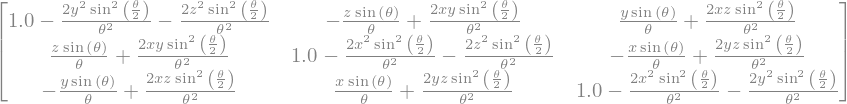

In [89]:
K = hat(axis)
R = numpy.eye(3) + sympy.sin(angle) * K + (2*sympy.sin(angle/2)**2) * K @ K
display(sympy.Matrix(R))

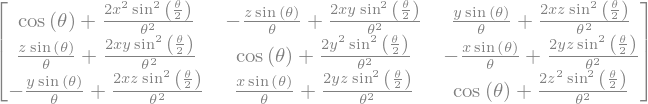

In [90]:
sin_axis = sympy.sin(angle) * axis;
c = sympy.cos(angle);
cos1_axis = (2*sympy.sin(angle/2)**2) * axis;

R = numpy.zeros((3, 3), dtype=sympy.Symbol)
tmp = cos1_axis[0] * axis[1];
R[0, 1] = tmp - sin_axis[2];
R[1, 0] = tmp + sin_axis[2];

tmp = cos1_axis[0] * axis[2];
R[0,2] = tmp + sin_axis[1];
R[2,0] = tmp - sin_axis[1];

tmp = cos1_axis[1] * axis[2];
R[1, 2] = tmp - sin_axis[0];
R[2, 1] = tmp + sin_axis[0];

R[[0, 1, 2], [0, 1, 2]] = cos1_axis * axis + c;
sympy.Matrix(R)